LIVER CIRRHOSIS STAGE CLASSIFICATION

1. LOADING THE DATA

In [ ]:
import pandas as pd
df=pd.read_csv("liver_cirrhosis.csv")

In [ ]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [ ]:
df.shape

(25000, 19)

In [ ]:
df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [ ]:
df.describe(include="O")

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
count,25000,25000,25000,25000,25000,25000,25000
unique,3,2,2,2,2,2,3
top,C,Placebo,F,N,N,N,N
freq,13516,15827,22137,16798,15243,13614,20220


In [ ]:
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

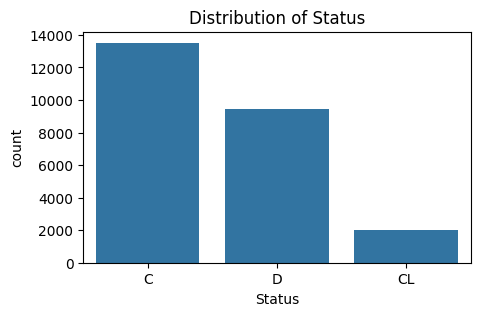

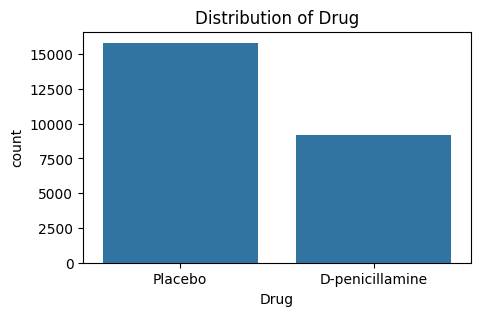

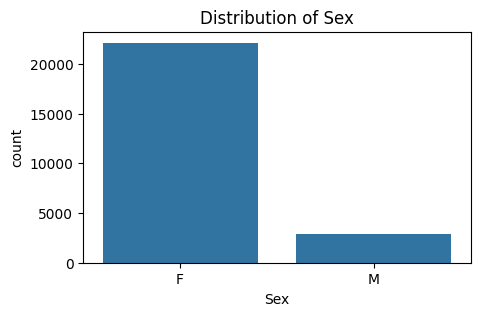

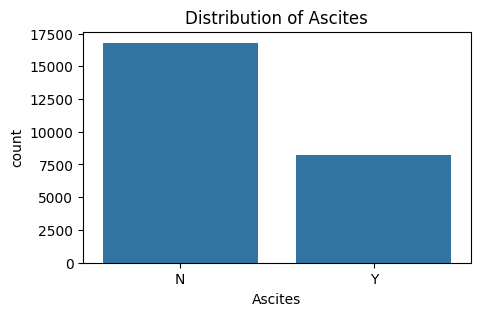

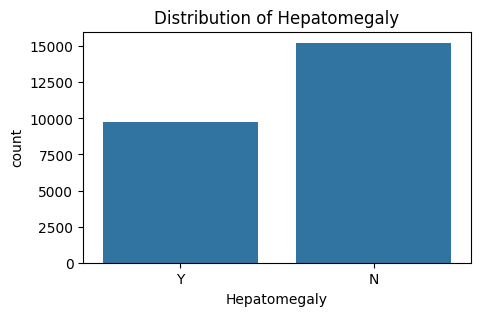

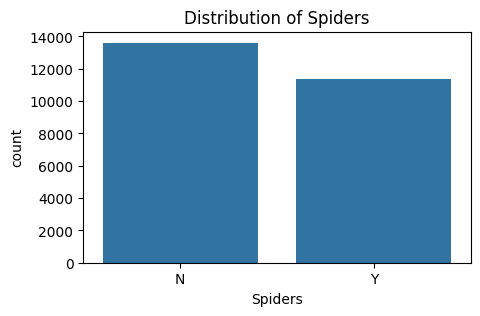

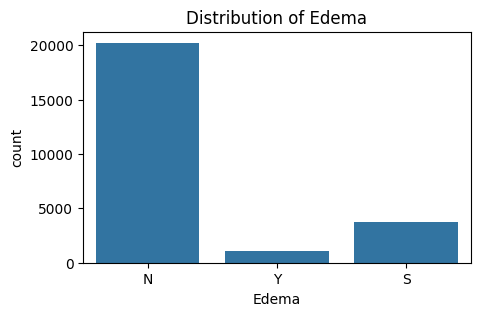

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()


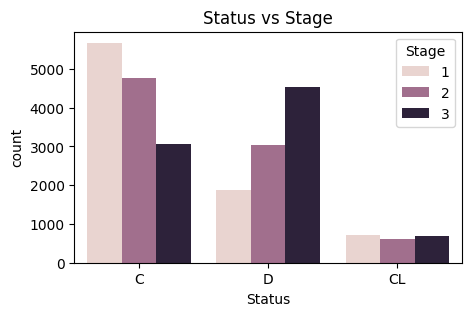

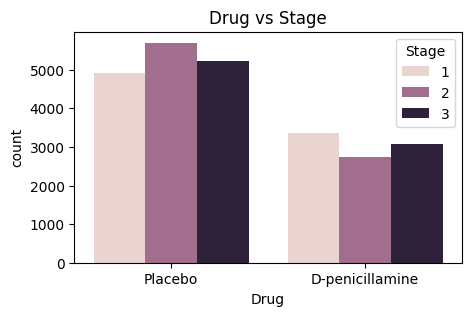

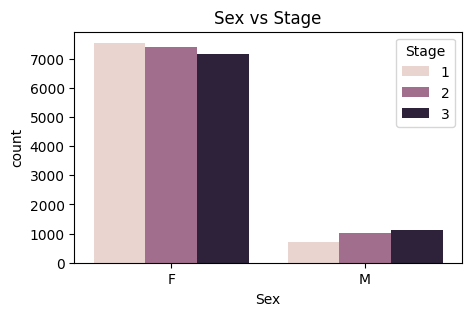

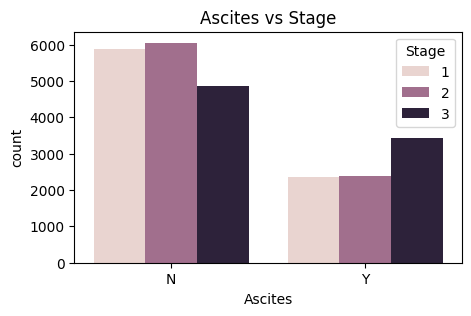

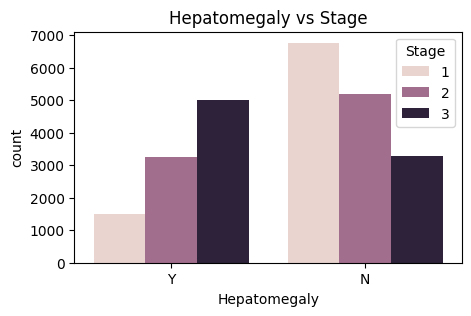

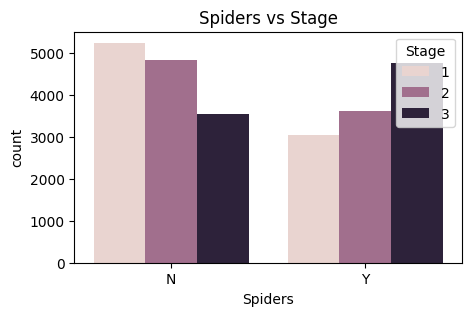

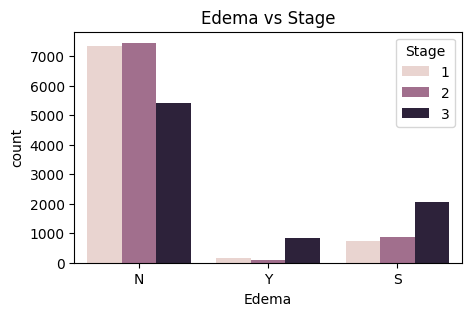

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col], hue=df['Stage'])
    plt.title(f'{col} vs Stage')
    plt.show()

In [ ]:
# from scipy.stats import chi2_contingency

# for col in ['Status', 'Drug']:
#     contingency = pd.crosstab(df[col], df['Stage'])
#     chi2, p, dof, ex = chi2_contingency(contingency)
#     print(f"{col}: p-value = {p:.4f}")


In [ ]:
# from scipy.stats import chi2_contingency
# for col in ['Sex', 'Ascites']:
#     table = pd.crosstab(df[col], df['Stage'])
#     chi2, p, _, _ = chi2_contingency(table)
#     print(f"{col}: p-value = {p:.5f}")


In [ ]:
from scipy.stats import chi2_contingency
for col in ['Status', 'Drug','Sex', 'Ascites','Hepatomegaly', 'Spiders', 'Edema']:
    table = pd.crosstab(df[col], df['Stage'])
    chi2, p, _, _ = chi2_contingency(table)
    print(f"{col}: p-value = {p:.5f}")

Status: p-value = 0.00000
Drug: p-value = 0.00000
Sex: p-value = 0.00000
Ascites: p-value = 0.00000
Hepatomegaly: p-value = 0.00000
Spiders: p-value = 0.00000
Edema: p-value = 0.00000


LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
cat_cols=['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df[cat_cols].head()


,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
0,0,1,0,0,1,0,0
1,0,1,1,1,0,1,0
2,0,1,0,0,0,0,0
3,2,1,0,0,0,0,0
4,2,1,0,0,1,0,0


CORRELATION ANALYSIS

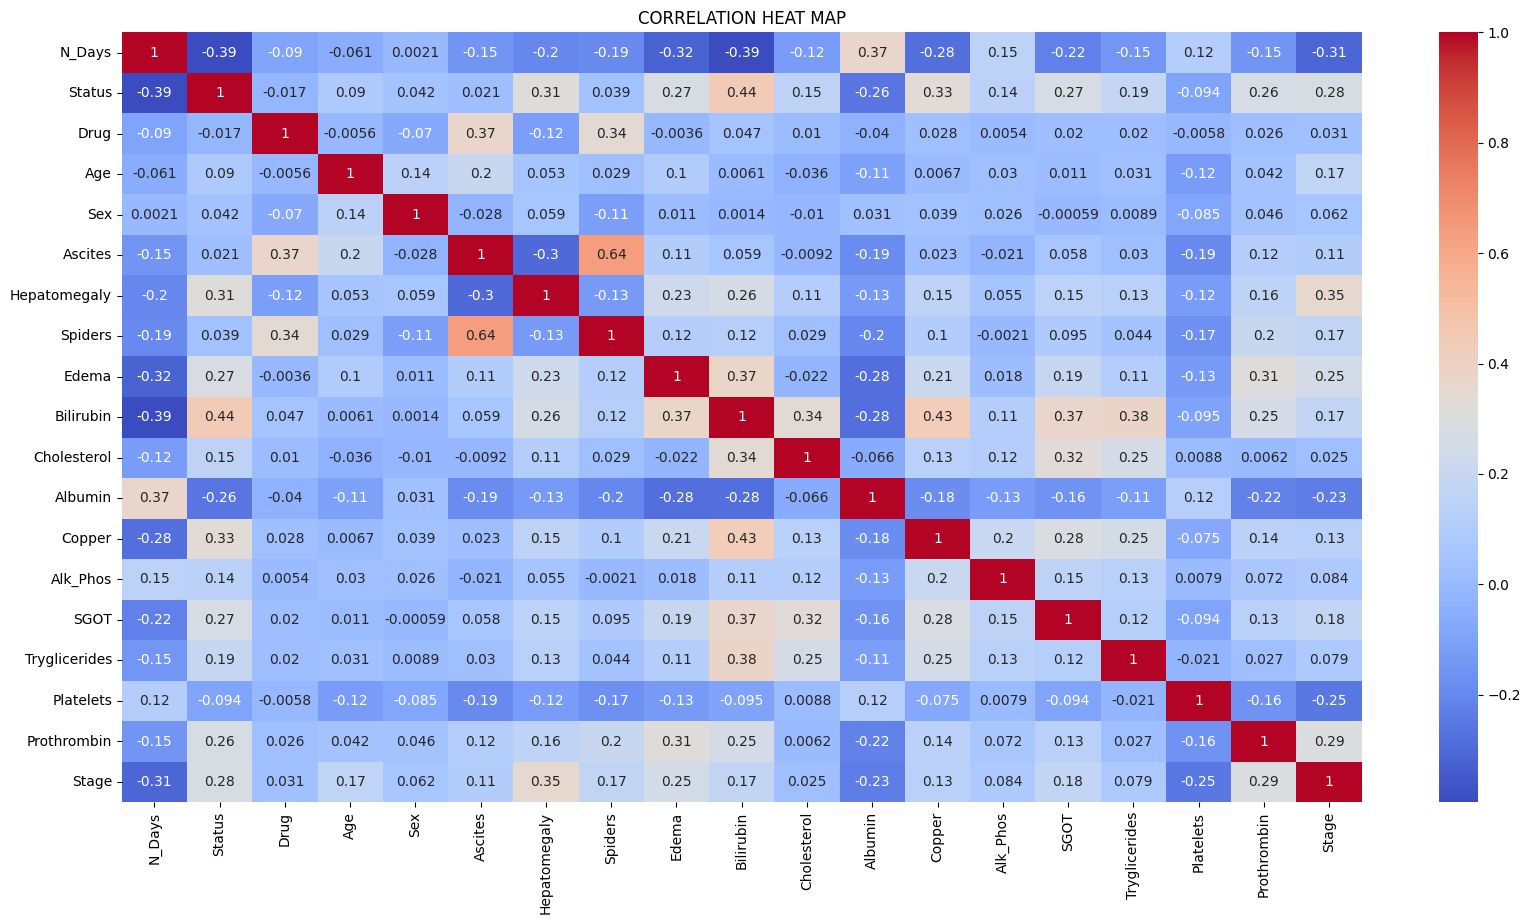

In [ ]:
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("CORRELATION HEAT MAP")
plt.show()

In [ ]:
df=df.drop(columns=['Spiders','Sex','Age'],axis=1)

In [ ]:
df

,N_Days,Status,Drug,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,0,1,0,1,0,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,0,1,1,0,0,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,0,1,0,0,0,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,2,1,0,0,0,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,2,1,0,1,0,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,2,0,0,0,0,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,2,0,0,0,0,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,2,0,0,1,2,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,0,0,0,1,0,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


Cholesterol      4.109331
Alk_Phos         3.387249
Tryglicerides    3.283869
Bilirubin        2.572463
Copper           2.506663
Prothrombin      1.861805
SGOT             1.406140
Platelets        0.761861
N_Days           0.541880
Stage           -0.002124
Albumin         -0.529510
dtype: float64


C:\Users\Aswathi\AppData\Local\Temp\ipykernel_8996\2704361223.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skew_values.values, y=skew_values.index, palette="coolwarm")


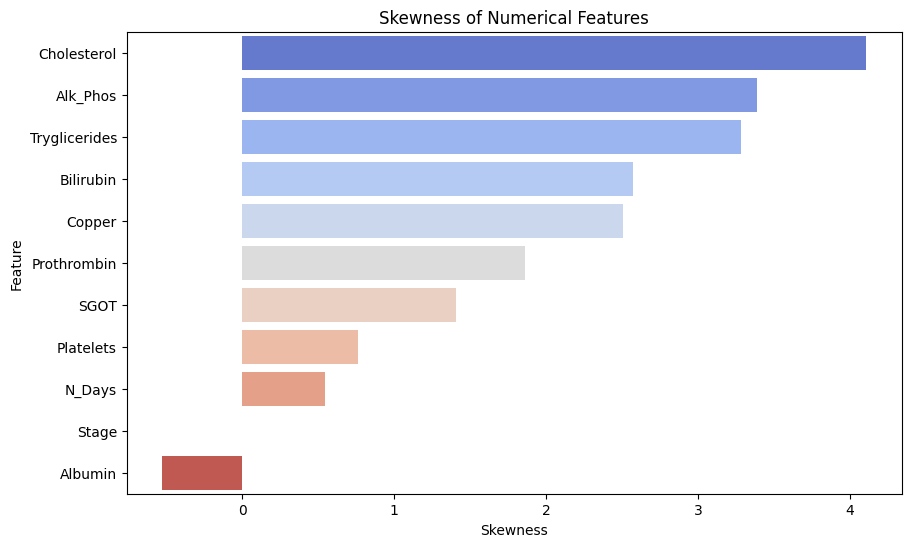

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
skew_values = df[numeric_cols].skew().sort_values(ascending=False)
print(skew_values)

plt.figure(figsize=(10,6))
sns.barplot(x=skew_values.values, y=skew_values.index, palette="coolwarm")
plt.title("Skewness of Numerical Features")
plt.xlabel("Skewness")
plt.ylabel("Feature")
plt.show()


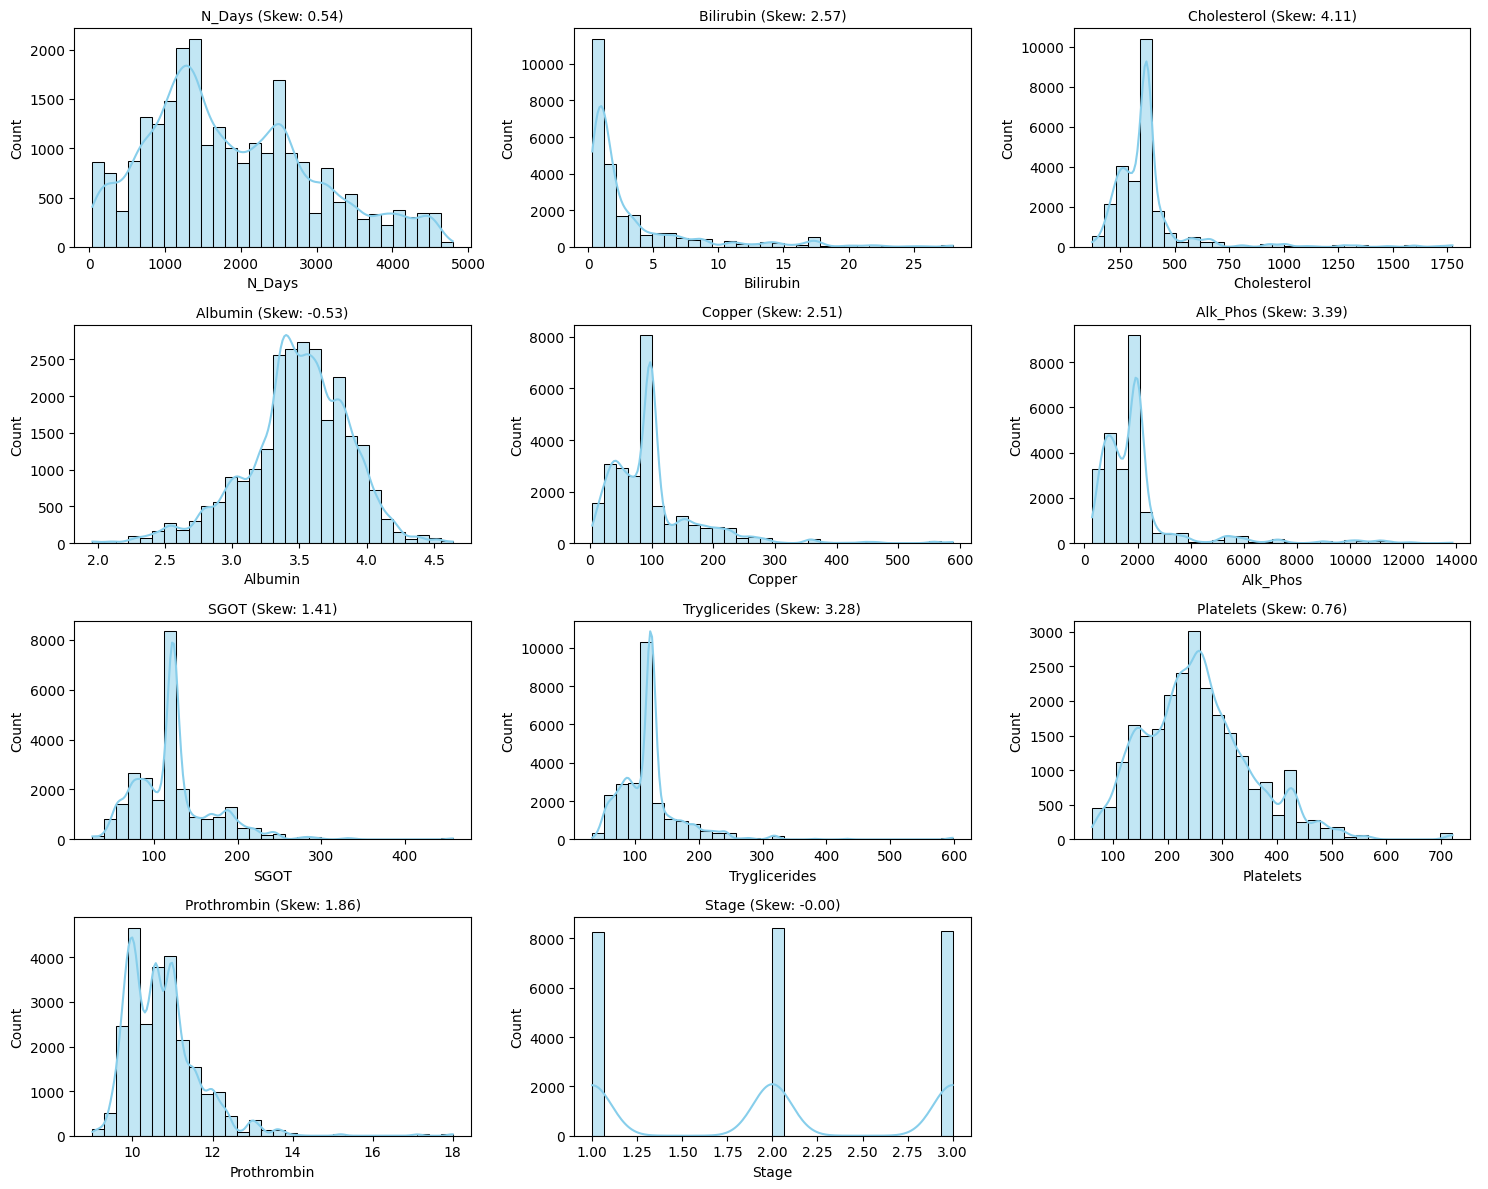

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f"{col} (Skew: {df[col].skew():.2f})", fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

cols_to_transform = ['Bilirubin', 'Cholesterol', 'Copper', 'Alk_Phos', 'Tryglicerides', 'Prothrombin']
for col in cols_to_transform:
    df[col+'_log'] = np.log1p(df[col])


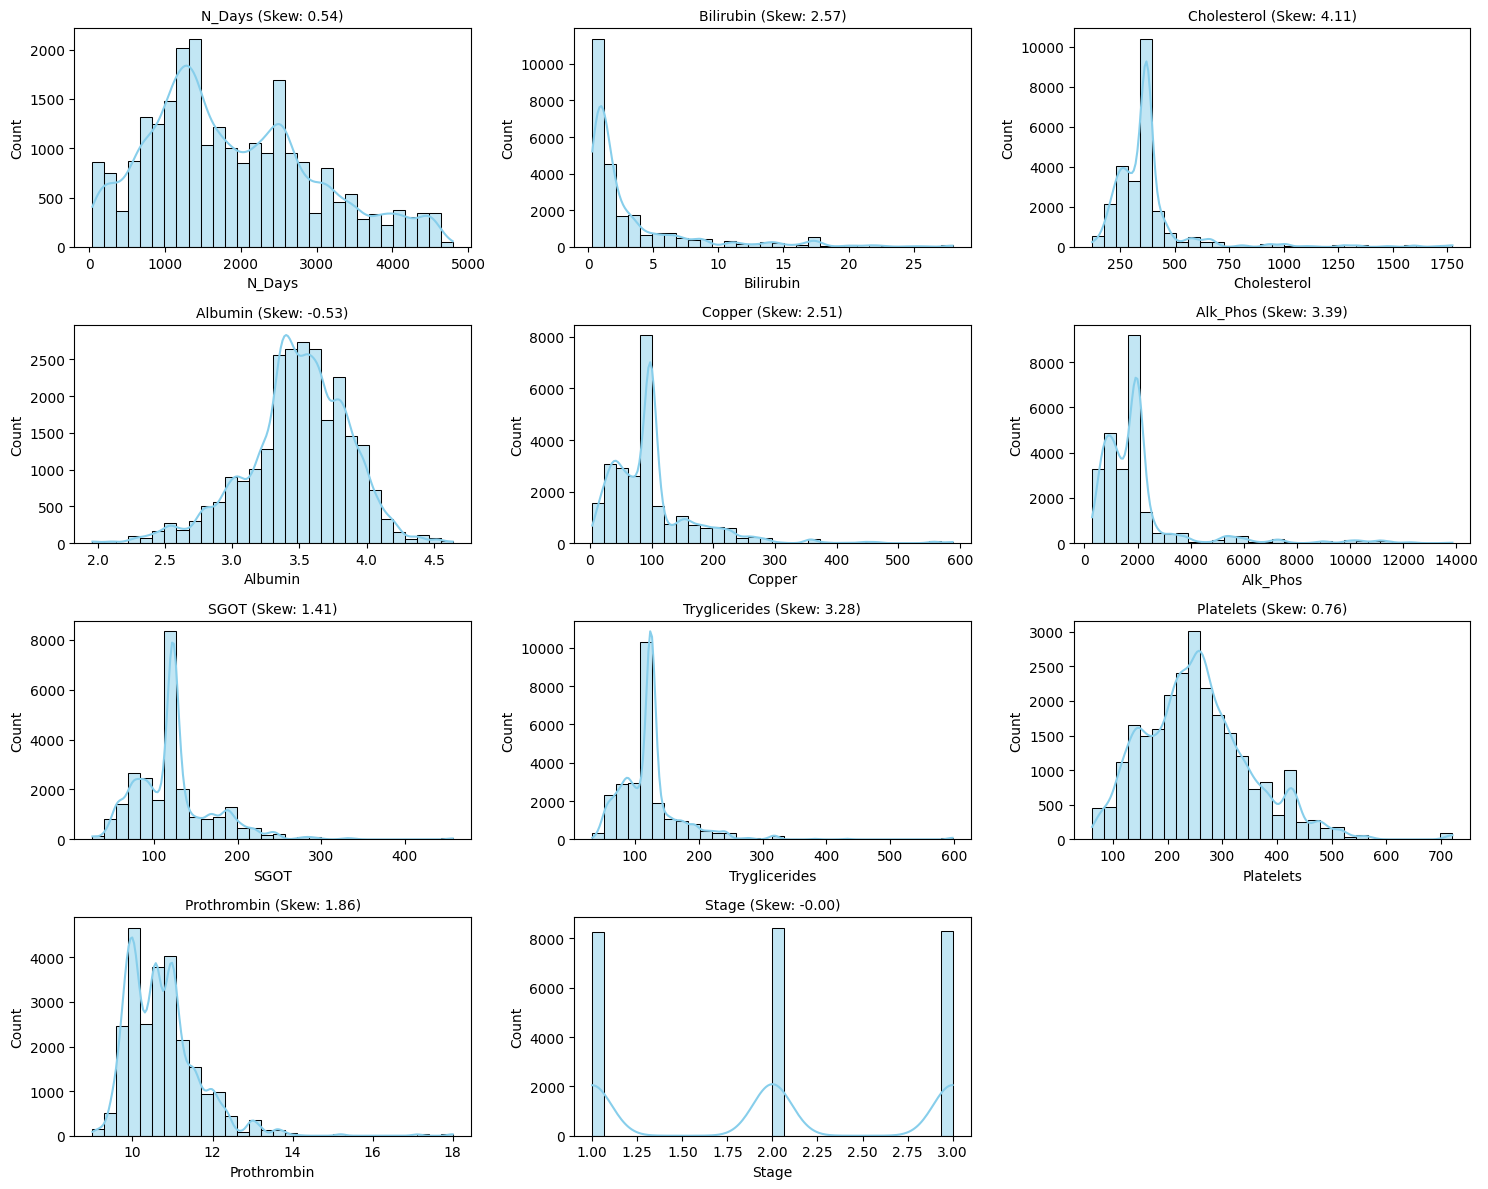

In [ ]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f"{col} (Skew: {df[col].skew():.2f})", fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
df['Status'].value_counts()

Status
0    13516
2     9456
1     2028
Name: count, dtype: int64

In [ ]:
df

,N_Days,Status,Drug,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,...,Tryglicerides,Platelets,Prothrombin,Stage,Bilirubin_log,Cholesterol_log,Copper_log,Alk_Phos_log,Tryglicerides_log,Prothrombin_log
0,2221,0,1,0,1,0,0.5,149.000000,4.04,227.0,...,57.000000,256.0,9.9,1,0.405465,5.010635,5.429346,6.395262,4.060443,2.388763
1,1230,0,1,1,0,0,0.5,219.000000,3.93,22.0,...,75.000000,220.0,10.8,2,0.405465,5.393628,3.135494,6.498282,4.330733,2.468100
2,4184,0,1,0,0,0,0.5,320.000000,3.54,51.0,...,80.000000,225.0,10.0,2,0.405465,5.771441,3.951244,7.126087,4.394449,2.397895
3,2090,2,1,0,0,0,0.7,255.000000,3.74,23.0,...,58.000000,151.0,10.2,2,0.530628,5.545177,3.178054,6.932448,4.077537,2.415914
4,2105,2,1,0,1,0,1.9,486.000000,3.54,74.0,...,109.000000,151.0,11.5,1,1.064711,6.188264,4.317488,6.959399,4.700480,2.525729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,2,0,0,0,0,0.8,231.000000,3.87,173.0,...,96.000000,295.0,11.0,2,0.587787,5.446737,5.159055,9.106179,4.574711,2.484907
24996,3584,2,0,0,0,0,0.8,231.000000,3.87,173.0,...,96.000000,295.0,11.0,2,0.587787,5.446737,5.159055,9.106179,4.574711,2.484907
24997,971,2,0,0,1,2,5.1,369.510563,3.23,18.0,...,124.702128,104.0,13.0,3,1.808289,5.914882,2.944439,6.673298,4.833915,2.639057
24998,3707,0,0,0,1,0,0.8,315.000000,4.24,13.0,...,70.000000,426.0,10.9,2,0.587787,5.755742,2.639057,7.401231,4.262680,2.476538


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
X = df.drop('Stage', axis=1)
y = df['Stage']

In [ ]:
X_train, X_test, ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=49)

In [ ]:
model=DecisionTreeClassifier(criterion='entropy',class_weight='balanced',max_depth=20,min_samples_split=2)

In [ ]:
model.fit(X_train,ytrain)

,criterion,'entropy'
,splitter,'best'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(ytest,y_pred))

Accuracy: 0.9154


In [ ]:
import pickle
with open("linear_accurate_model.pkl","wb") as f:
    pickle.dump(model,f)

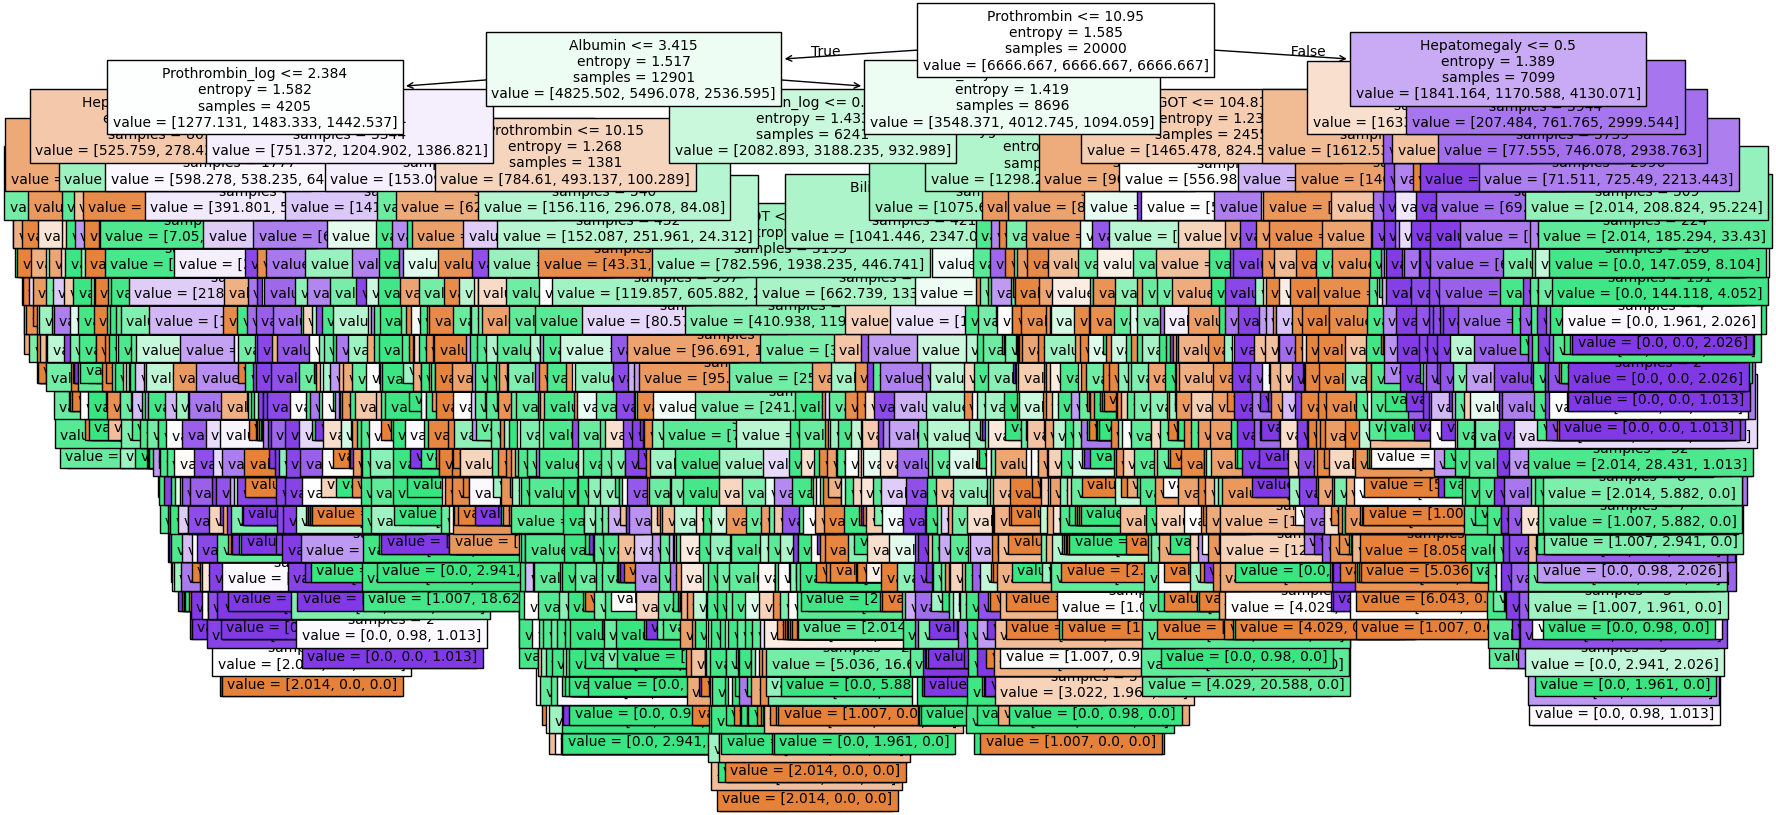

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, fontsize=10, feature_names=X.columns)
plt.show()


Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, ytrain)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Best Accuracy: 0.9188000000000001


In [ ]:
import pickle
with open("decision_livercirrhosis_model.pkl","wb") as f:
    pickle.dump(grid,f)

In [ ]:
y_pred1=grid.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score,recall_score,classification_report

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy: {accuracy_score(ytest, y_pred1):.4f}")
print(f"Precision: {precision_score(ytest, y_pred1, average='weighted'):.4f}")
print(f"Recall: {recall_score(ytest, y_pred1, average='weighted'):.4f}")
print(f"F1-score: {f1_score(ytest, y_pred1, average='weighted'):.4f}")


Accuracy: 0.9150
Precision: 0.9152
Recall: 0.9150
F1-score: 0.9151


In [ ]:

from sklearn.model_selection import RandomizedSearchCV

dt = DecisionTreeClassifier(random_state=42)

param_dist = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}

random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=3,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, ytrain)

print("Best Parameters found:", random_search.best_params_)

best_dt = random_search.best_estimator_

y_pred = best_dt.predict(X_test)

print(f"\nAccuracy: {accuracy_score(ytest, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(ytest, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters found: {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20, 'criterion': 'entropy'}

Accuracy: 0.9114

Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.92      0.91      1646
           2       0.89      0.90      0.89      1641
           3       0.95      0.91      0.93      1713

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000

